In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import catch_warnings
from warnings import filterwarnings

In [194]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'D:\aa\working_results\Book3.CSV',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,pm25,pm10,no2,so2,co,o3
Date,,,,,,
2017-10-17 10:00:00,110.75,234.67,82.22,101.55,1.06,27.12
2017-10-17 11:00:00,165.34,536.91,49.09,130.76,0.98,87.85
2017-10-17 12:00:00,130.91,555.58,43.34,129.64,0.53,79.69
2017-10-17 13:00:00,126.39,556.05,32.97,103.30,0.40,78.19
2017-10-17 14:00:00,131.90,504.41,42.27,94.55,0.17,72.72


In [195]:
df.tail()

,pm25,pm10,no2,so2,co,o3
Date,,,,,,
2022-12-16 08:00:00,51.14,207.80,63.70,11.43,1.00,7.86
2022-12-16 09:00:00,75.18,241.10,83.39,13.30,1.06,26.08
2022-12-16 10:00:00,62.42,219.90,64.22,14.29,0.88,43.84
2022-12-16 11:00:00,54.10,173.33,53.70,12.77,0.80,56.66
2022-12-16 12:00:00,33.23,133.40,51.72,30.68,0.89,37.06


<AxesSubplot:>

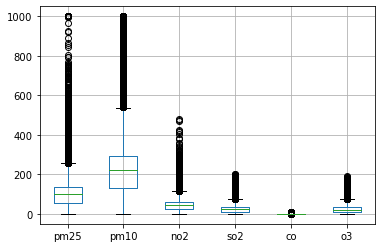

In [196]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [197]:
dataset_columns = df.columns.tolist()
dataset_columns

['pm25', 'pm10', 'no2', 'so2', 'co', 'o3']

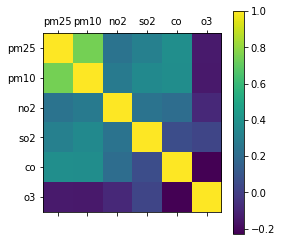

In [198]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [199]:
from sklearn.model_selection import train_test_split

# ["pm25","pm10","no2","o3","so2","co","temp","rhum","wspd","pres","pm25_AQI","pm10_AQI","no2_AQI","o3_AQI","so2_AQI","overall_AQI", "row_index"]

features=df.values
targets=df[["pm25"]].values

#X_train, X_test, y_train, y_test  = train_test_split(features, targets, test_size=0.1, random_state=1, shuffle=False)

#X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)

print("features:", features.shape)
print("targets:", targets.shape)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
#print("X_val:", X_val.shape)

print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
#print("y_val:", y_val.shape)

features: (45267, 6)
targets: (45267, 1)
X_train: (45194, 6)
X_test: (73, 6)
y_train: (40740, 1)
y_test: (4527, 1)


In [200]:
#Splitting the dataset 365*0.2=73
#Splitting the dataset 365*0.3=110
n_train = 73
X_train, X_test = features[n_train:,] ,features[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = targets[n_train:,] , targets[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (45194, 6)
X_test (73, 6)
Y_train (45194, 1)
Y_test (73, 1)


In [201]:
 from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

#X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


X_train.shape, X_test.shape

((45194, 6), (73, 6))

In [211]:
Y_test.shape[0]

73

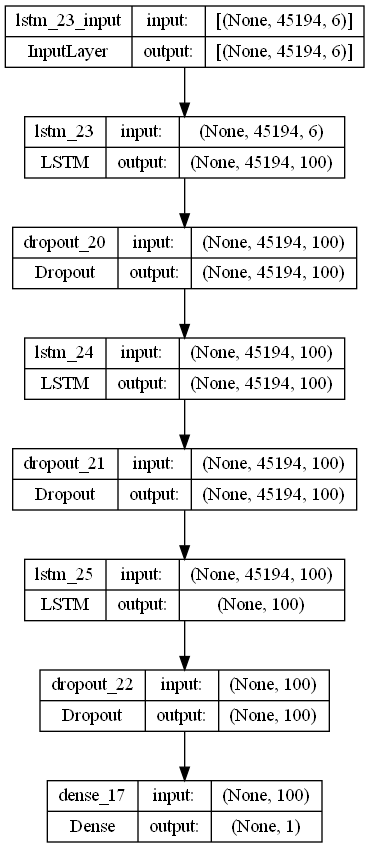

In [212]:

#Importing LSTM model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import tensorflow as tf
model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape=(X_train.shape[0],X_train.shape[1])))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

#model.compile(optimizer = 'adam', loss = 'mean_squared_error')     
opt = keras.optimizers.Adam(learning_rate=0.1)
#model.compile(loss='mean_squared_error', optimizer=opt)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError())
tf.keras.utils.plot_model(model=model, show_shapes=True)

In [213]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 45194, 100)        42800     
                                                                 
 dropout_20 (Dropout)        (None, 45194, 100)        0         
                                                                 
 lstm_24 (LSTM)              (None, 45194, 100)        80400     
                                                                 
 dropout_21 (Dropout)        (None, 45194, 100)        0         
                                                                 
 lstm_25 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_22 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 1)               

In [219]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
prepared_model_CNNLSTM = model.fit(X_train, 
                                       validation_data=Y_train,
                                       epochs=100, #200
                                       shuffle=False,
                                       callbacks=[lr_monitor, early_stopping])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [215]:
history = model.fit(X_train, Y_train, epochs=5,
                    batch_size=32, 
                    #validation_data=(X_train, Y_train),
                    verbose=2, shuffle=False)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_24" is incompatible with the layer: expected shape=(None, 45194, 6), found shape=(None, 6)


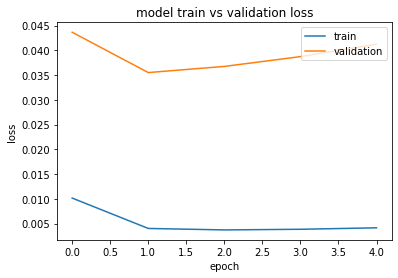

In [216]:
# plot train and validation loss
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [217]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

In [218]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

ValueError: in user code:

    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\91783\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_24" is incompatible with the layer: expected shape=(None, 45194, 6), found shape=(None, 6)


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

In [ ]:
def call(c):
    history = model.fit(X_train, Y_train, epochs=c,
                    batch_size=32, validation_data=(X_test,Y_test),
                    verbose=2, shuffle=False)
        # plot train and validation loss
    from matplotlib import pyplot
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model train vs validation loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='upper right')
    pyplot.show()
    Y_pred = model.predict(X_test)

    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(Y_test, Y_pred)
    print(mse)

    rmse = np.sqrt(mse)
    print(rmse)
    
    #fn
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape = mean_absolute_percentage_error(Y_test, Y_pred)
    print('MAPE', mape)

In [ ]:
'''for i in range(5,200,5):
   print(i)'''

In [ ]:
l=[50,100,150,200,250]
for i in l:
    call(i)


In [ ]:
#Scaling back to the original scale
d = scaled_dataset[:255,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:110,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:110,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

In [ ]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

In [ ]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted[:90,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:90,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')
 

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_tested, Y_predicted)
r2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

In [ ]:
# A simple plot to visualize the correlation between the columns
#df.plot(subplots=True)
df.plot(subplots=True,figsize=(15,13));


In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()